# Homecooked Linear Regression

## Introduction

Recently I have been learning about machine/statistical learning w/ Stanford Online and mathematics with MIT Open Courseware.

I made a [linkedin post](https://www.linkedin.com/feed/update/urn:li:activity:6389831251448205312) to a video where Prof. Dennis Auroux explains how to calculate linear regression and I found that to be quite interesting, so I want to try and build my own linear regression algorithm.

The regression that I am going to calculate is going to be for only one feature/input and output, which will take the form of vectors.

Although the same concepts will likely scale up to multiple linear regression, I just wanted to try these ideas out on a small scale to get comfortable with them first.

I will write the regression as a series of functions. After I complete these functions in my notebook, I will compile them into a single class in a `.py` that can be imported.

## Part 1: Explaining Linear Regression

When thinking about writing a package that performs linear regression, we'll want to consider how to plot a line through a series of points to give the best fit. 

### Straight Lines

Lines are often expressed in the following form:

$$y = mx + b$$

Where the output ($y$) is equal to some slope ($m$) by the input variable ($x$) and some initial constant ($b$). The statistical version of this takes a smilar form:

### Linear Regression

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_{1}x_i + \epsilon$$

It's easy to get intimidated by statistical notation, but you'll notice that the estimated output vector ($\hat{y}_i$) -where the hat denotes an estimation- is equal to the constant term ($\hat{\beta}_0$) plus the slope ($\hat{\beta}_1$) times your input vector (${x}_i$) plus an error term ($\epsilon$).

### Determining Fit w/ Least Squares

When determining how good our fit is, we're going to need to think about what the error term of our function is. Most of the time, least squares is used. The basic idea is to minimise the distance from the output real output ($y_i$) and the predicted value shown in the equation above.

Hence, for each point we want to minimise the following value:

$$y_i - (\hat{\beta}_0 + \hat{\beta}_1\hat{x}_i)$$

We want to take the sumnation of this, because we are doing this for each measured observation ($x_i$) and effect ($y_i$):

$$D(\hat{\beta}_0, \hat{\beta}_1) = \sum_{i = n}^{n}[y_i - (\hat{\beta}_0 + \hat{\beta}_1\hat{x}_i)]^2$$

### Optimisation using multi-variate calculus

#### Some quick rules

To optimise this value, we are going to want to take derivatives of our least squares function. This is possible because of the **composition rule**, which states that if a function is equal to the sum of multiple functions, then the differentiated function will be equal to each of the component functions. Or, in mathematical notation:

$$f(x) = g(x) + h(x)$$

$$f'(x) = g'(x) + h'(x) $$

Note what we will also need to use the **chain rule**:

$$f(x) = g(h(x))$$

$$f'(x) = h'(x)g'(h(x))$$

#### Taking Partial Derivatives

Since this is also a multivaraite equation, we'll want to use partial derivatives because they are easier to compute. This will retun simultaneous equations that we can solve using linear algebra. Hence;

$$\frac{\partial D(\hat{\beta}_0, \hat{\beta}_1)}{\partial\hat{\beta}_0}=\sum_{i=1}^{n}2(y_i-\hat{\beta}_{0}-\hat{\beta}_1x_i)(-1)=0$$

$$\frac{\partial D(\hat{\beta}_0, \hat{\beta}_1)}{\partial\hat{\beta}_1}=\sum_{i=1}^{n}2(y_i-\beta_0-\hat{\beta}_1x_i)(-x_i)=0$$

Note that these equations are set to 0 because we want to find where the point is smallest. This means that we can divide by the leading coefficient ($2$) and still have valid equations, which we can then expand further.

$$\sum_{i=1}^{n}(\hat{\beta}_{0}+\hat{\beta}_1x_i-y_i)=0$$

$$\sum_{i=1}^{n}(\hat{\beta}_{0}x_i+\hat{\beta}_1x_{i}^{2}-y_{i}x_{i})=0$$

Finally, we recieve our linear system:

$$n\hat{\beta}_{0}+\sum_{i=1}^{n}x_i(\hat{\beta}_1) = \sum_{i=1}^{n}y_i$$

$$\sum_{i=1}^{n}x_{i}(\hat{\beta}_{0})+\sum_{i=1}^{n}x_{i}^{2}(\hat{\beta}_1) = \sum_{i=1}^{n}x_{i}y_{i}$$

Now that I look at it, our linear system is rather elegant because the second equation is the same as the first equation times the sum for all the input values, $x_i$

Note that the sumnations will result in constants that depend on the data!

Since the unknowns that we want to find are $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$, we can rewrite this into matrix format:

$$\begin{bmatrix} n & \sum_{i=1}^{n}x_{i} \\ \sum_{i=1}^{n}x_{i} & \sum_{i=1}^{n}x_{i}^2 \end{bmatrix}
\begin{bmatrix}\hat{\beta}_{0} \\ \hat{\beta}_{1} \end{bmatrix}
=
\begin{bmatrix} \sum_{i=1}^{n}y_{i} \\ \sum_{i=1}^{n}y_{i}x_{i} \end{bmatrix}$$

Thus, as long as the square matrix on the left hand side is invertable:

$$\begin{bmatrix}\hat{\beta}_{0} \\ \hat{\beta}_{1} \end{bmatrix}
=
\begin{bmatrix} n & \sum_{i=1}^{n}x_{i} \\ \sum_{i=1}^{n}x_{i} & \sum_{i=1}^{n}x_{i}^2 \end{bmatrix}^{-1}
\begin{bmatrix} \sum_{i=1}^{n}y_{i} \\ \sum_{i=1}^{n}y_{i}x_{i} \end{bmatrix}$$

### Checking our work

Now that I've derived the linear algebra that we'll need to perform this machine learning, let's test it quickly using some toy-data. Let's say that $x_i = y_i = [1, 2, 3]$. This should product a straight line through the origin where the slope is equal to 1.

$$\begin{bmatrix}\hat{\beta}_{0} \\ \hat{\beta}_{1} \end{bmatrix}
=
\begin{bmatrix} 3 & 6 \\ 6 & 14 \end{bmatrix}^{-1}
\begin{bmatrix} 6 \\ 14 \end{bmatrix}$$

$$
\begin{bmatrix}\hat{\beta}_{0} \\ \hat{\beta}_{1} \end{bmatrix}
=
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

**IT'S ALIVE!!!!!**

## Part 2: Creating the Functions

Now that I've laid the groundwork required to calculate our required values, let's start writing the functions we'll need

In [70]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create lienar regression function.
def lin_reg(x_i, y_i):
    """
    Fits a linear regression to data to predict the experimental outcome.
    
    x_i: Input, numpy array, list or series.
    y_i: Observed output, 
    
    Note: x_i and y_i must be equal.
    
    Returns the predicted/estimated slope and intercept of the regression in the form of a list:
    
    list: [slope, intercept]
    """
    
    # Convert to np array
    x_i = np.array(x_i)
    y_i = np.array(y_i)
    
    # First we'll calculate n
    n = len(x_i)
    
    # Check that x_i and y_i are the same length
    try: 
        n == len(y_i)
    except:
        print("Error, the lengths of x_i and y_i are not equivalent")
    
    # Calculate the sums as required
    sum_x = x_i.sum()
    sum_y = y_i.sum()
    sum_xy = x_i.dot(y_i)
    sum_xx = sum(x_i**2)
    
    # Solve for Ax=b => x=A^{-1}b
    
    # Assemble Matrix A
    A = np.matrix("{}, {}; {}, {}".format(n, sum_x, sum_x, sum_xx))
    
    # Calculate A^-1
    try: A_inv = A.I
    except: print("Matrix has no inverse")
    
    # Assemble vector b
    b = np.matrix("{}; {}".format(sum_y, sum_xy))
    
    # Calculate x
    x = A_inv * b
    
    # Convert formats
    slope = float(x[1])
    intercept = float(x[0])
    
    # Return as DataFrame
    return pd.DataFrame.from_dict(data={"Intercept": [intercept], "Slope": [slope]})

## Part 3: Trying it out!

Now that we've written the linear regression, we can fit it to data we've generated. 

Afterwards, we can see the result of this fit using matplotlib.

In [88]:
# Initialize "observed" values
y_i = [1, 5, 2, 6, 3, 7]
x_i = [1, 2, 3, 4, 5, 6]

# Create the fit using the lin_reg function from earlier
fit = lin_reg(x_i, y_i)

# Calculate predicted values
x_pred = [1, 2, 3, 4, 5, 6]
y_pred = []
for i in x_pred:
    y_pred.append(float((fit.Slope * i) + fit.Intercept))

# Check values
y_pred

[1.9999999999999956,
 2.7999999999999954,
 3.599999999999995,
 4.399999999999995,
 5.199999999999995,
 5.999999999999995]

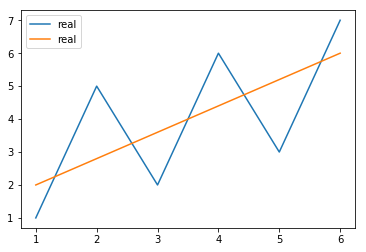

In [89]:
# Create plot
plt.plot(x_i, y_i, label="real")
plt.plot(x_pred, y_pred, label="real")
plt.legend()
plt.show()